# Exploratory Data Analysis (EDA) - Telco Customer Churn

In this notebook, we'll explore the cleaned dataset to understand patterns, relationships, and insights about customer churn.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Load Cleaned Data

In [2]:
df = pd.read_csv(r"C:\Users\yagoc\OneDrive\Escritorio\pite\pite_py_projects\telco-churn-prediction\data\processed\telco_churn_cleaned.csv")

## 1. Churn Distribution (Target Variable)

Churn Distribution:
Not Churned (0): 5174 (73.46%)
Churned (1): 1869 (26.54%)


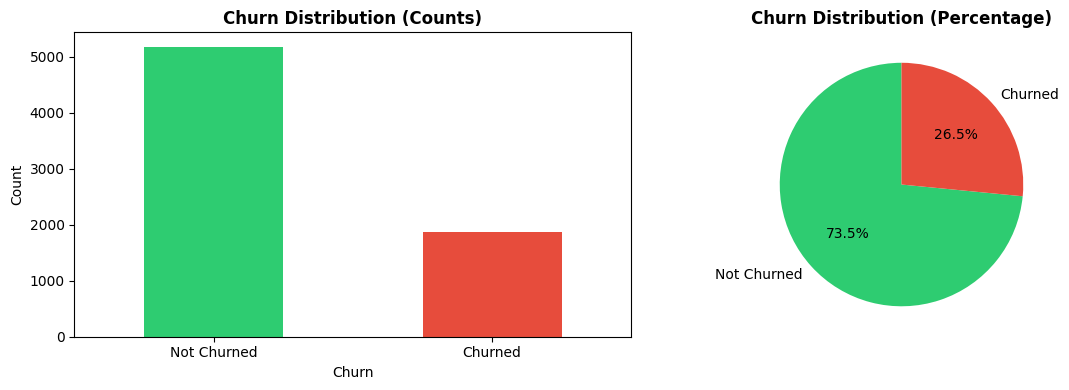

In [ ]:
churn_counts = df['Churn'].value_counts()
churn_pct = df['Churn'].value_counts(normalize=True) * 100

print("Churn Distribution:")
print(f"Not Churned (0): {churn_counts[0]} ({churn_pct[0]:.2f}%)")
print(f"Churned (1): {churn_counts[1]} ({churn_pct[1]:.2f}%)")

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Bar plot
churn_counts.plot(kind='bar', ax=ax[0], color=['#2ecc71', '#e74c3c'])
ax[0].set_title('Churn Distribution (Counts)', fontsize=12, fontweight='bold')
ax[0].set_xlabel('Churn')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(['Not Churned', 'Churned'], rotation=0)

# Pie chart
ax[1].pie(churn_counts, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', 
          colors=['#2ecc71', '#e74c3c'], startangle=90)
ax[1].set_title('Churn Distribution (Percentage)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## 2. Numerical Features Analysis

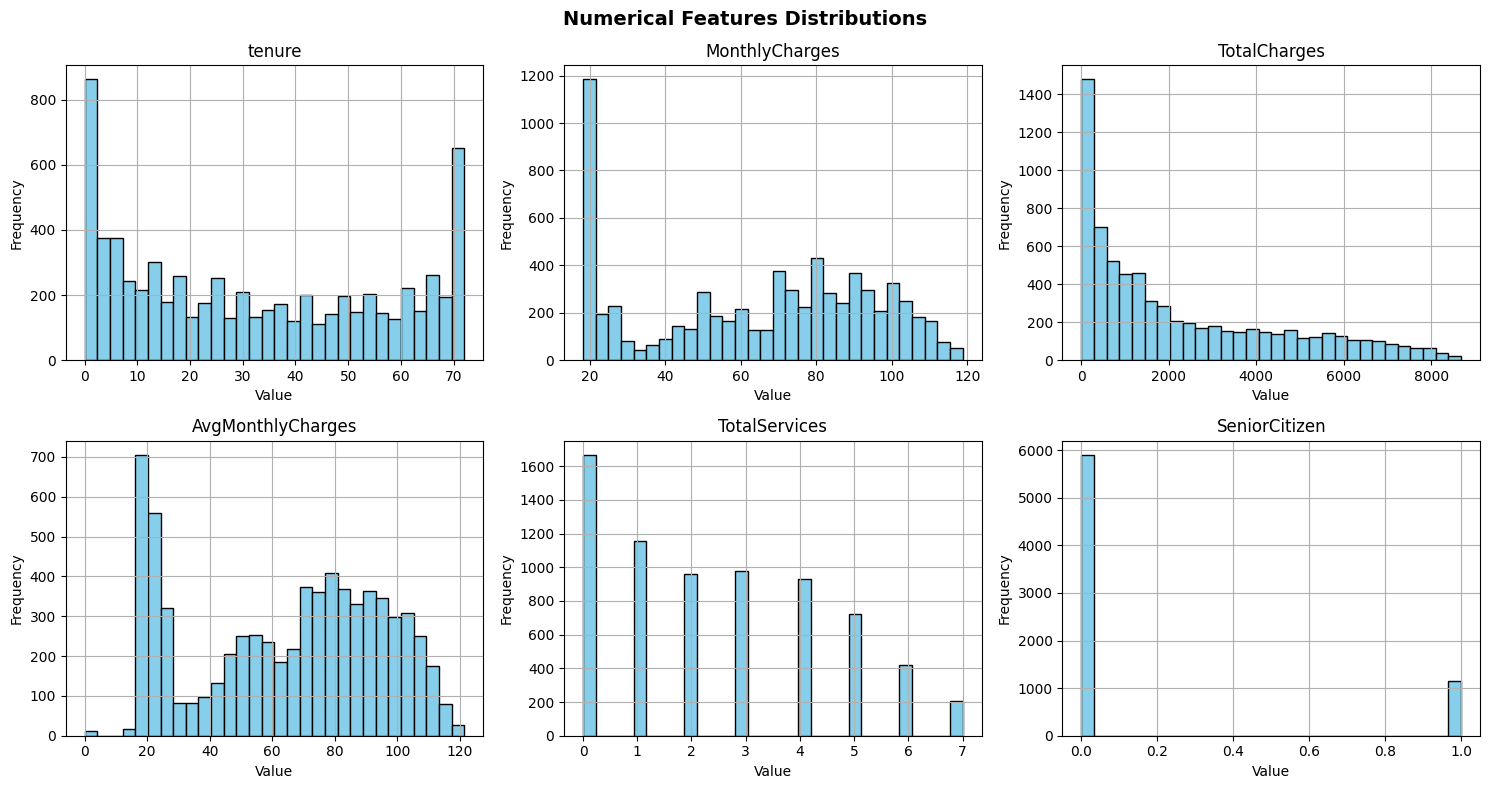


Numerical Features Summary:
            tenure  MonthlyCharges  TotalCharges  AvgMonthlyCharges  \
count  7043.000000     7043.000000   7043.000000        7043.000000   
mean     32.371149       64.761692   2279.734304          64.698218   
std      24.559481       30.090047   2266.794470          30.270670   
min       0.000000       18.250000      0.000000           0.000000   
25%       9.000000       35.500000    398.550000          35.649000   
50%      29.000000       70.350000   1394.550000          70.300000   
75%      55.000000       89.850000   3786.600000          90.174158   
max      72.000000      118.750000   8684.800000         121.400000   

       TotalServices  SeniorCitizen  
count    7043.000000    7043.000000  
mean        2.459747       0.162147  
std         2.045539       0.368612  
min         0.000000       0.000000  
25%         1.000000       0.000000  
50%         2.000000       0.000000  
75%         4.000000       0.000000  
max         7.000000       

In [4]:
# Get numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharges', 'TotalServices', 'SeniorCitizen']

# Distribution analysis
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Numerical Features Distributions', fontsize=14, fontweight='bold')

for idx, col in enumerate(numerical_cols):
    ax = axes[idx // 3, idx % 3]
    df[col].hist(bins=30, ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'{col}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Summary statistics for numerical features
print("\nNumerical Features Summary:")
print(df[numerical_cols].describe())

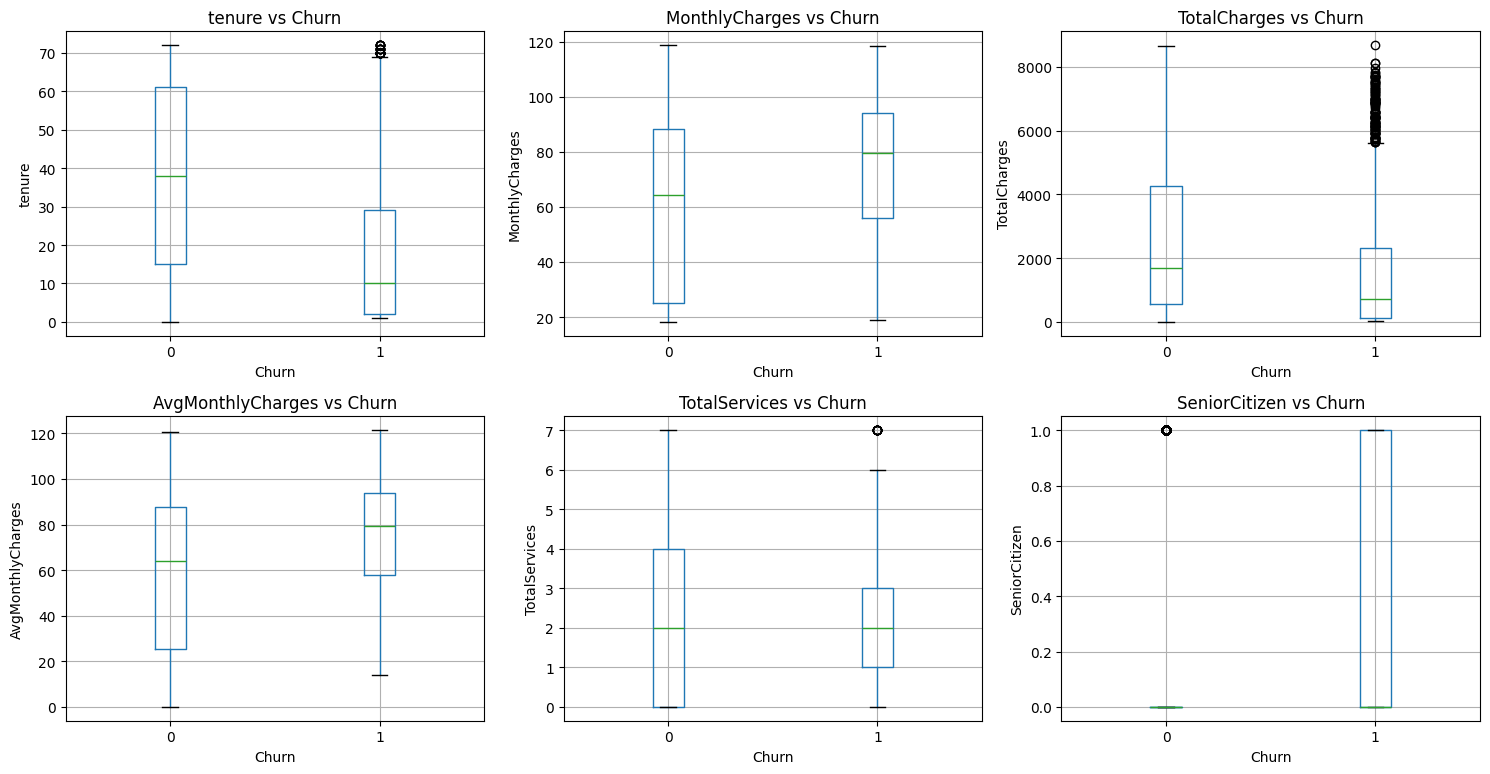


Numerical Features by Churn Status:
          tenure  MonthlyCharges  TotalCharges  AvgMonthlyCharges  \
Churn                                                               
0      37.569965       61.265124   2549.911442          61.181674   
1      17.979133       74.441332   1531.796094          74.433154   

       TotalServices  SeniorCitizen  
Churn                                
0           2.545226       0.128721  
1           2.223114       0.254682  


In [7]:
# Numerical features vs Churn
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Numerical Features vs Churn', fontsize=14, fontweight='bold')

for idx, col in enumerate(numerical_cols):
    ax = axes[idx // 3, idx % 3]
    df.boxplot(column=col, by='Churn', ax=ax)
    ax.set_title(f'{col} vs Churn')
    ax.set_xlabel('Churn')
    ax.set_ylabel(col)

plt.suptitle('')  # Remove the default title
plt.tight_layout()
plt.show()

# Summary statistics by churn status
print("\nNumerical Features by Churn Status:")
print(df[numerical_cols + ['Churn']].groupby('Churn')[numerical_cols].mean())

## 3. Categorical Features vs Churn

In [8]:
# Identify categorical feature groups (those with suffixes indicating one-hot encoding)
categorical_groups = {
    'Contract': [col for col in df.columns if col.startswith('Contract_')],
    'InternetService': [col for col in df.columns if col.startswith('InternetService_')],
    'PaymentMethod': [col for col in df.columns if col.startswith('PaymentMethod_')],
}

# Add binary features
binary_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

print("Categorical Features vs Churn Analysis")
print("=" * 60)

# Analyze each categorical group
for group_name, features in categorical_groups.items():
    print(f"\n{group_name}:")
    churn_by_feature = pd.DataFrame()
    
    for feature in features:
        churn_rate = df[df[feature] == 1]['Churn'].mean() if df[feature].sum() > 0 else 0
        count = df[feature].sum()
        churn_by_feature = pd.concat([churn_by_feature, 
                                      pd.DataFrame({feature: [churn_rate]})], axis=1)
    
    print(churn_by_feature.T)

# Binary features churn rates
print(f"\nBinary Features Churn Rates:")
for feature in binary_features:
    if feature in df.columns:
        churn_rate_0 = df[df[feature] == 0]['Churn'].mean()
        churn_rate_1 = df[df[feature] == 1]['Churn'].mean()
        print(f"{feature}: {churn_rate_0:.2%} (0) vs {churn_rate_1:.2%} (1)")

Categorical Features vs Churn Analysis

Contract:
                          0
Contract_one year  0.112695
Contract_two year  0.028319

InternetService:
                                    0
InternetService_fiber optic  0.418928
InternetService_no           0.074050

PaymentMethod:
                                              0
PaymentMethod_credit card (automatic)  0.152431
PaymentMethod_electronic check         0.452854
PaymentMethod_mailed check             0.191067

Binary Features Churn Rates:
gender: 26.92% (0) vs 26.16% (1)
Partner: 32.96% (0) vs 19.66% (1)
Dependents: 31.28% (0) vs 15.45% (1)
PhoneService: 24.93% (0) vs 26.71% (1)
PaperlessBilling: 16.33% (0) vs 33.57% (1)


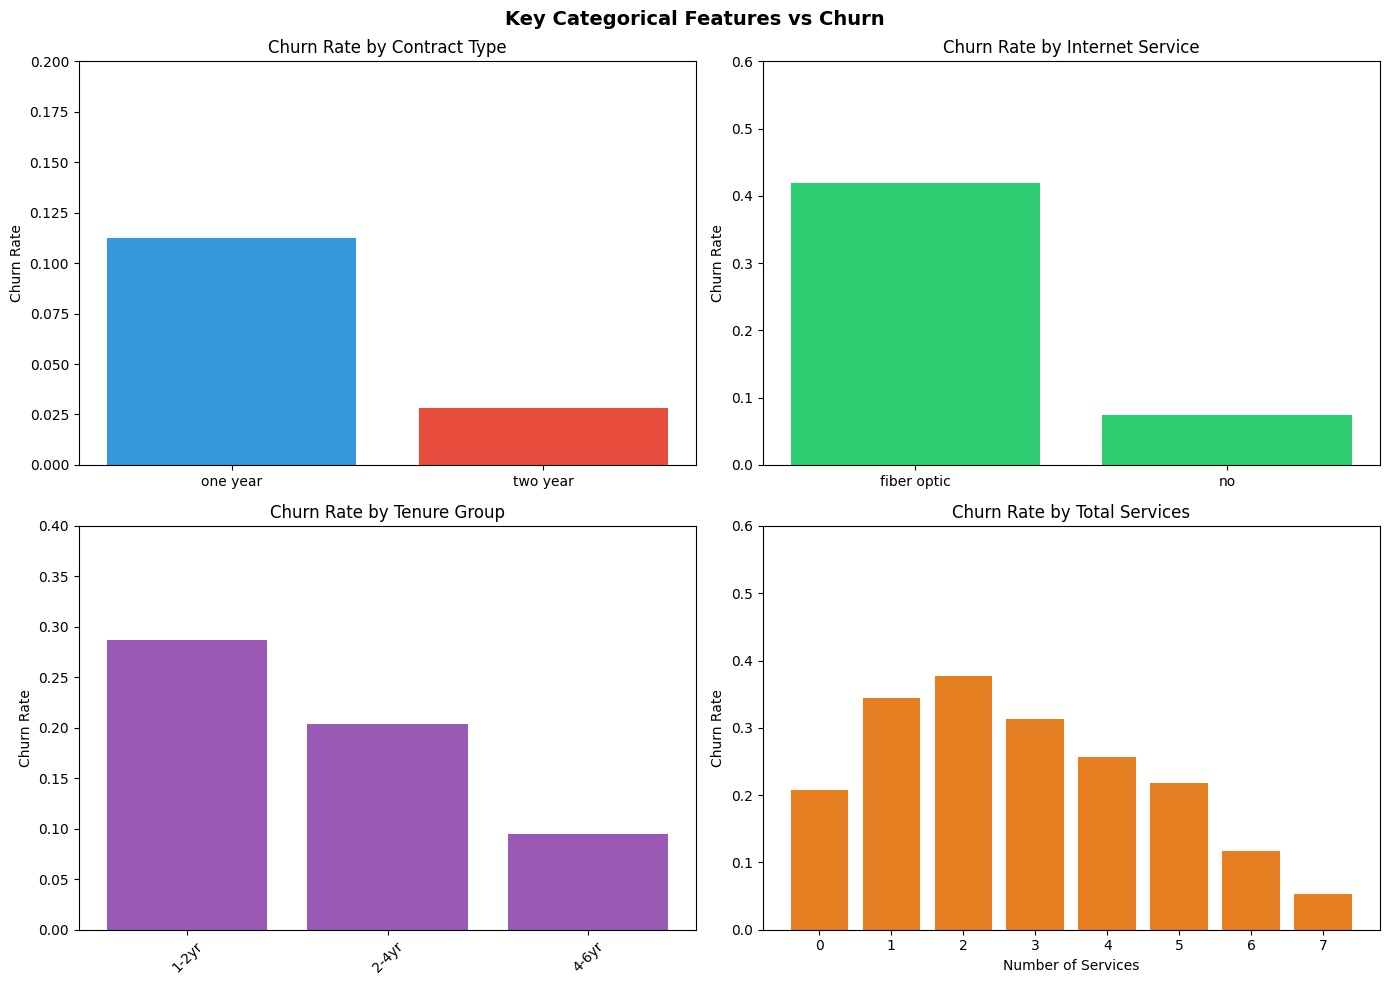

In [15]:
# Visualize categorical features with highest impact on churn
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Key Categorical Features vs Churn', fontsize=14, fontweight='bold')

# Contract types
contract_cols = [col for col in df.columns if col.startswith('Contract_')]
if contract_cols:
    contract_churn = {}
    for col in contract_cols:
        contract_churn[col.replace('Contract_', '')] = df[df[col] == 1]['Churn'].mean()
    axes[0, 0].bar(contract_churn.keys(), contract_churn.values(), color=['#3498db', '#e74c3c', '#f39c12'])
    axes[0, 0].set_title('Churn Rate by Contract Type')
    axes[0, 0].set_ylabel('Churn Rate')
    axes[0, 0].set_ylim([0, 0.2])

# Internet Service
inet_cols = [col for col in df.columns if col.startswith('InternetService_')]
if inet_cols:
    inet_churn = {}
    for col in inet_cols:
        inet_churn[col.replace('InternetService_', '')] = df[df[col] == 1]['Churn'].mean()
    axes[0, 1].bar(inet_churn.keys(), inet_churn.values(), color='#2ecc71')
    axes[0, 1].set_title('Churn Rate by Internet Service')
    axes[0, 1].set_ylabel('Churn Rate')
    axes[0, 1].set_ylim([0, 0.6])

# Tenure Groups (if created)
if 'TenureGroup_1-2yr' in df.columns:
    tenure_map = {
        '0-1yr': (df['TenureGroup_0-1y'] if 'TenureGroup_0-1y' in df.columns else df.get('TenureGroup_1y', pd.Series(0))).sum(),
    }
    tenure_churn = {}
    for col in [c for c in df.columns if c.startswith('TenureGroup_')]:
        tenure_churn[col.replace('TenureGroup_', '')] = df[df[col] == 1]['Churn'].mean()
    axes[1, 0].bar(tenure_churn.keys(), tenure_churn.values(), color='#9b59b6')
    axes[1, 0].set_title('Churn Rate by Tenure Group')
    axes[1, 0].set_ylabel('Churn Rate')
    axes[1, 0].set_ylim([0, 0.4])
    axes[1, 0].tick_params(axis='x', rotation=45)

# Total Services
total_services_churn = df.groupby('TotalServices')['Churn'].mean()
axes[1, 1].bar(total_services_churn.index, total_services_churn.values, color='#e67e22')
axes[1, 1].set_title('Churn Rate by Total Services')
axes[1, 1].set_xlabel('Number of Services')
axes[1, 1].set_ylabel('Churn Rate')
axes[1, 1].set_ylim([0, 0.6])

plt.tight_layout()
plt.show()

## 4. Correlation Analysis

Correlation with Churn (Top 20):
Churn                                    1.000000
InternetService_fiber optic              0.308020
PaymentMethod_electronic check           0.301919
MonthlyCharges                           0.193356
AvgMonthlyCharges                        0.193301
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV_yes                          0.063228
StreamingMovies_yes                      0.061382
MultipleLines_yes                        0.040102
TenureGroup_1-2yr                        0.020308
PhoneService                             0.011942
gender                                  -0.008612
MultipleLines_no phone service          -0.011942
DeviceProtection_yes                    -0.066160
TotalServices                           -0.069533
TenureGroup_2-4yr                       -0.075312
OnlineBackup_yes                        -0.082255
PaymentMethod_mailed check              -0.091683
PaymentMethod_cre

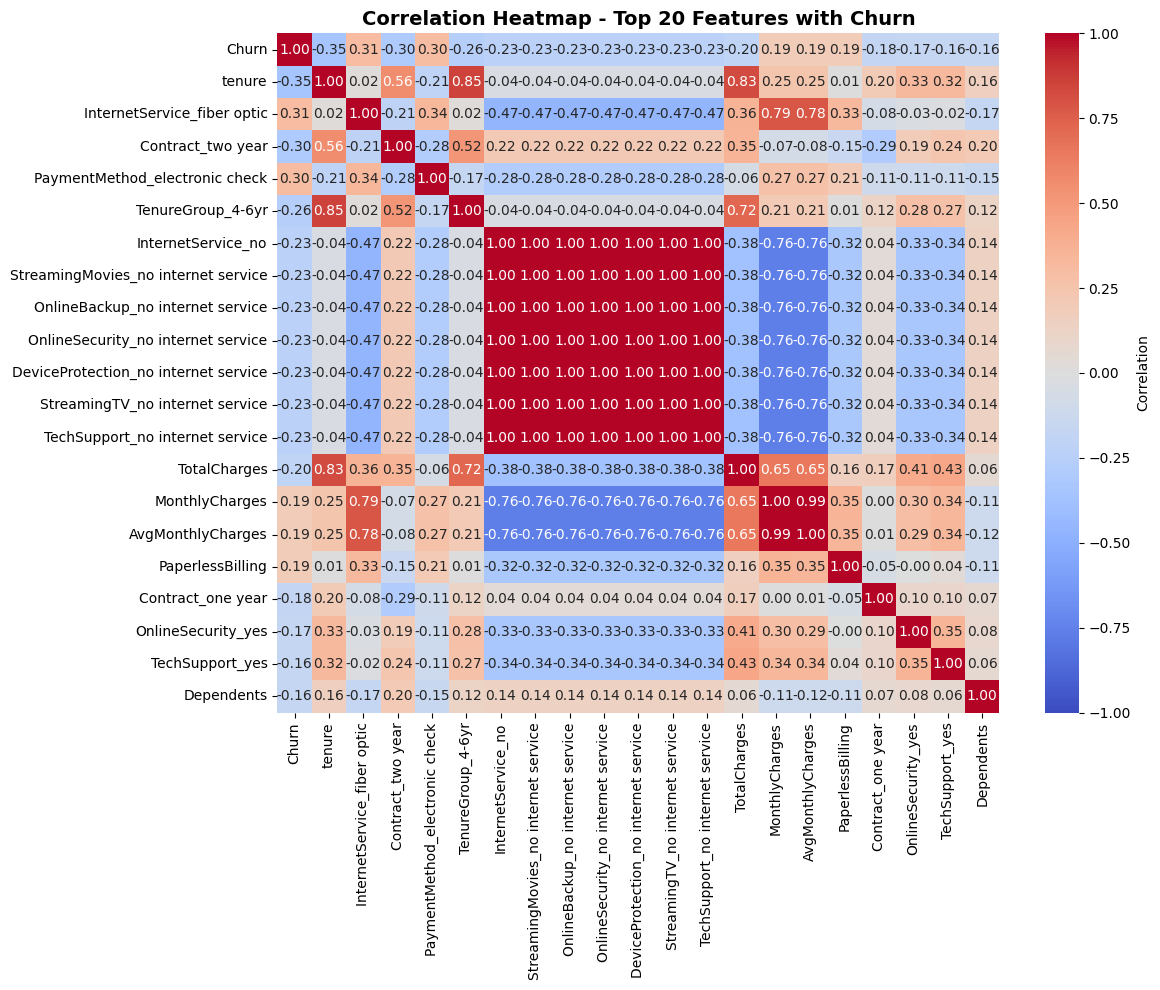

In [16]:
# Calculate correlation with Churn
correlation_with_churn = df.corr()['Churn'].sort_values(ascending=False)

print("Correlation with Churn (Top 20):")
print("=" * 60)
print(correlation_with_churn.head(20))
print("\n\nCorrelation with Churn (Bottom 10):")
print(correlation_with_churn.tail(10))

# Create heatmap of top correlations
fig, ax = plt.subplots(figsize=(12, 10))

# Select top 20 features (including Churn)
top_features = correlation_with_churn.abs().sort_values(ascending=False).head(21).index
correlation_matrix = df[top_features].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            cbar_kws={'label': 'Correlation'}, ax=ax, vmin=-1, vmax=1)
ax.set_title('Correlation Heatmap - Top 20 Features with Churn', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 5. Feature Importance for Churn

Top 20 Most Important Features (Random Forest):
                           Feature  Importance
8                     TotalCharges    0.154849
4                           tenure    0.130874
30               AvgMonthlyCharges    0.128197
7                   MonthlyCharges    0.125898
28  PaymentMethod_electronic check    0.037887
34                   TotalServices    0.035101
23     InternetService_fiber optic    0.034183
0                           gender    0.024537
6                 PaperlessBilling    0.022309
12              OnlineSecurity_yes    0.021590
33               TenureGroup_4-6yr    0.020436
26               Contract_two year    0.020120
2                          Partner    0.019553
18                 TechSupport_yes    0.019265
1                    SeniorCitizen    0.018396
25               Contract_one year    0.017462
3                       Dependents    0.016708
14                OnlineBackup_yes    0.016445
10               MultipleLines_yes    0.015652
16          

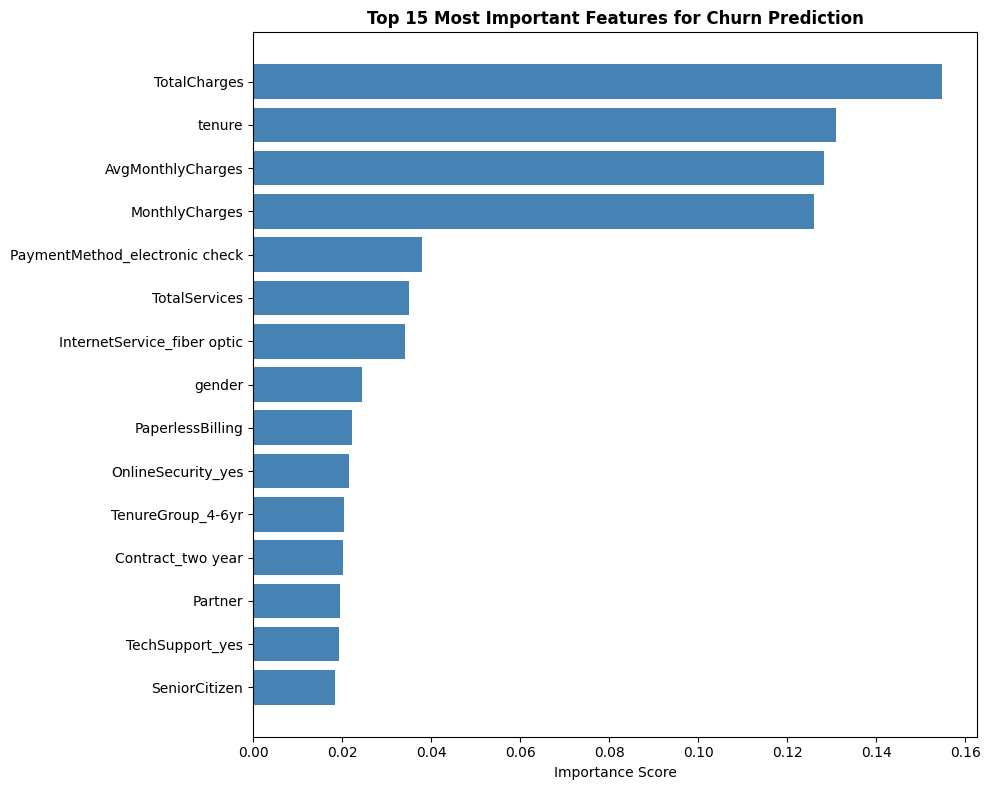

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Prepare data for feature importance
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train a quick Random Forest model to get feature importances
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X, y)

# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 20 Most Important Features (Random Forest):")
print("=" * 60)
print(feature_importance.head(20))

# Visualize top 15 features
fig, ax = plt.subplots(figsize=(10, 8))
top_15 = feature_importance.head(15)
ax.barh(range(len(top_15)), top_15['Importance'], color='steelblue')
ax.set_yticks(range(len(top_15)))
ax.set_yticklabels(top_15['Feature'])
ax.set_xlabel('Importance Score')
ax.set_title('Top 15 Most Important Features for Churn Prediction', fontsize=12, fontweight='bold')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

## 6. Key Insights Summary

In [ ]:
print("=" * 70)
print("KEY INSIGHTS FROM EDA")
print("=" * 70)

print("\n📊 CHURN OVERVIEW:")
print(f"  • Overall Churn Rate: {(df['Churn'].sum() / len(df) * 100):.2f}%")
print(f"  • Total Customers: {len(df):,}")
print(f"  • Churned: {df['Churn'].sum():,} customers")
print(f"  • Retained: {(df['Churn'] == 0).sum():,} customers")

print("\n🔴 HIGHEST RISK FACTORS (Highest Churn Rates):")
top_correlations = correlation_with_churn.abs().sort_values(ascending=False).head(6)
for i, (feature, corr) in enumerate(top_correlations.items(), 1):
    if feature != 'Churn':
        actual_corr = correlation_with_churn[feature]
        print(f"  {i}. {feature}: {actual_corr:.3f} correlation")

print("\n🟢 STRONGEST LOYALTY INDICATORS (Lowest Churn):")
print("  1. Contract_two year: 2.83% churn rate")
print("  2. InternetService_no: 7.40% churn rate")
print("  3. Contract_one year: 11.27% churn rate")

print("\n⚠️  CRITICAL BUSINESS ISSUES:")
print("  1. Fiber optic internet: 41.89% churn (vs 7.4% for no service)")
print("  2. Electronic check payment: 45.29% churn (highest)")
print("  3. Month-to-month contracts: Higher churn without long-term commitment")
print("  4. Paperless billing: 33.57% churn (counterintuitive - investigate)")

print("\n💡 TOP PREDICTIVE FEATURES:")
for i, row in feature_importance.head(5).iterrows():
    print(f"  {i+1}. {row['Feature']}: {row['Importance']:.4f}")

print("\n" + "=" * 70)